In [3]:
import numpy as np
import pandas as pd
df=pd.read_csv("/demo.csv")
df

,math score,reading score,writing score,placement score,placement offer count,club join year
0,80,68,70,89,3,2019
1,71,61,85,91,3,2019
2,79,16,87,77,2,2018
3,61,77,74,76,2,2020
4,78,71,67,90,3,2019
5,73,68,90,80,2,2019
6,77,62,70,35,2,2020
7,74,45,80,12,1,2019
8,76,60,79,77,2,2020
9,75,65,85,87,3,2018


In [4]:
sorted_rscore= sorted(df['reading score'])

In [5]:
sorted_rscore

[1,
 16,
 45,
 60,
 60,
 61,
 62,
 62,
 62,
 65,
 65,
 65,
 67,
 67,
 68,
 68,
 69,
 70,
 71,
 72,
 73,
 74,
 77,
 77,
 77,
 78,
 79,
 80,
 120]

In [6]:
q1 = np.percentile(sorted_rscore, 25)
q3 = np.percentile(sorted_rscore, 75)
print(q1,q3)

62.0 74.0


In [7]:
IQR = q3-q1

In [8]:
lwr_bound = q1-(1.5*IQR)
upr_bound = q3+(1.5*IQR)
print(lwr_bound, upr_bound)

44.0 92.0


In [12]:
r_outliers = []
for i in sorted_rscore:
  if(i<lwr_bound or i>upr_bound):
    r_outliers.append(i)
print(r_outliers)

[1, 16, 120]


<Axes: >

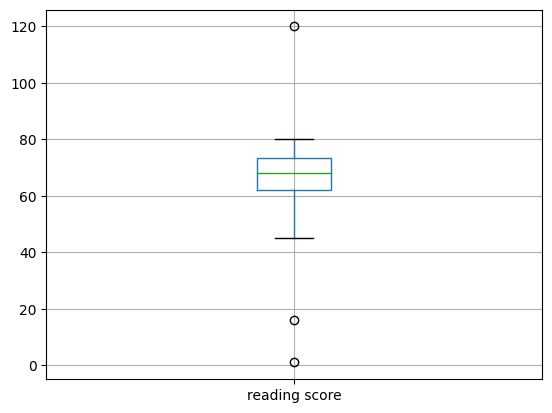

In [16]:
col = ['reading score']
df.boxplot(col)

In [17]:
median=np.median(sorted_rscore)
median

68.0

In [19]:
refined_df=df
refined_df['reading score'] = np.where(refined_df['reading score'] >upr_bound, median,refined_df['reading score'])

In [21]:
refined_df['reading score'] = np.where(refined_df['reading score'] <lwr_bound, median,refined_df['reading score'])

<Axes: >

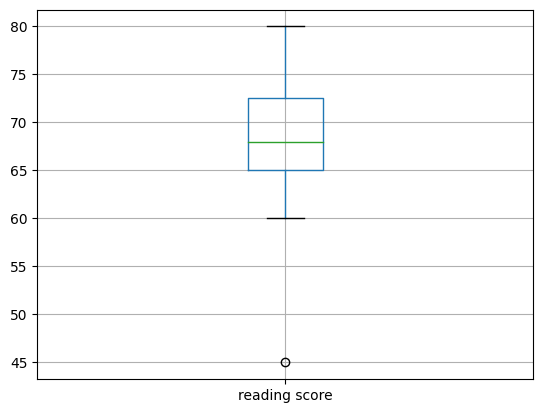

In [22]:
col = ['reading score']
refined_df.boxplot(col)